# EDA for MCMF Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
!pip uninstall pillow

^C


In [ ]:
!pip install Pillow==4.0.0

In [29]:
!pip install shinywidgets

     ---------------------------------------- 1.8/1.8 MB 10.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
data = pd.read_csv("cleaned_data.csv")

C:\Users\jagli\AppData\Local\Temp\ipykernel_3912\1136404764.py:1: DtypeWarning: Columns (14,28,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("cleaned_data.csv")


## Basic Information

In [5]:
data.shape

(72790, 53)

In [6]:
data.nunique()

Unnamed: 0                         72790
index_row                          72790
id                                 63057
program_name                       16944
description                        12033
org_name                             239
category_name                         21
capacity                             170
min_age                               24
max_age                               56
meeting_type                           1
address                             1079
city                                   1
state                                  3
zipcode                              171
online_address                     43123
program_url                        60914
registration_url                   57331
registration_open                    154
registration_deadline                533
start_date                          1013
end_date                            1052
start_time                           138
end_time                             221
scheduled_mon   

We can see that there are 74241 unique programs.

In [49]:
70000 / 72790

0.9616705591427394

<AxesSubplot:title={'center':'MCMF NA Values'}, xlabel='Feature Name', ylabel='Number of NA Values'>

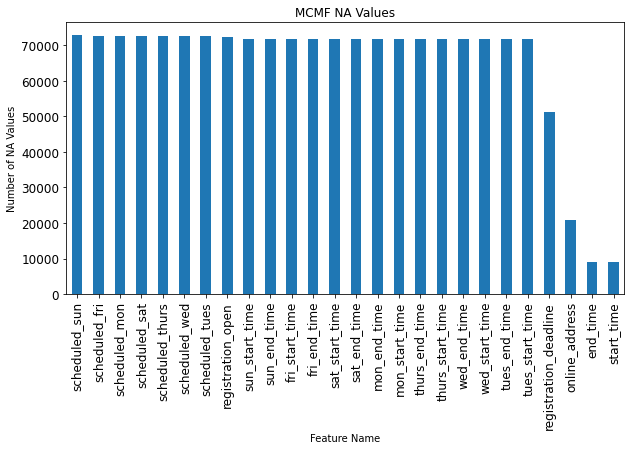

In [53]:
data.isnull().sum().sort_values(ascending=False)[:26].plot(kind="bar",
                                                           title="MCMF NA Values",
                                                           figsize=(10,5),
                                                           xlabel="Feature Name",
                                                           ylabel="Number of NA Values",
                                                           fontsize="large")

<AxesSubplot:>

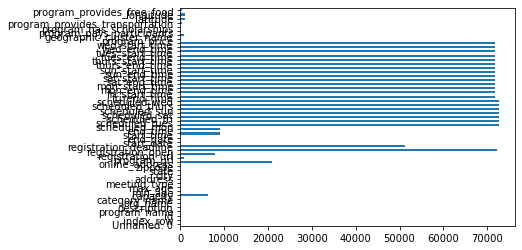

In [15]:
data.isnull().sum().plot(kind='barh')

Many columns have null values .  We will need to decide what to do with these values (drop, impute, etc.). 

In [55]:
data.dtypes.value_counts()

object     46
int64       4
float64     3
dtype: int64

<AxesSubplot:title={'center':'MCMF Data Types'}>

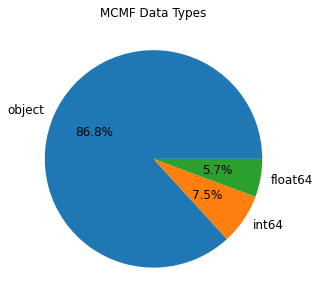

In [72]:
data.dtypes.value_counts().plot(kind="pie",
                                                           title="MCMF Data Types",
                                                           figsize=(8,5),
                                                           xlabel="Data Type",
                                                           ylabel="",
                                                           fontsize="large",
                                                           autopct='%1.1f%%')

Many columns are "object" data types.  We may need to convert these to numeric or string types.

In [56]:
data.columns

Index(['Unnamed: 0', 'index_row', 'id', 'program_name', 'description',
       'org_name', 'category_name', 'capacity', 'min_age', 'max_age',
       'meeting_type', 'address', 'city', 'state', 'zipcode', 'online_address',
       'program_url', 'registration_url', 'registration_open',
       'registration_deadline', 'start_date', 'end_date', 'start_time',
       'end_time', 'scheduled_mon', 'scheduled_tues', 'scheduled_fri',
       'scheduled_sat', 'scheduled_sun', 'scheduled_thurs', 'scheduled_wed',
       'fri_end_time', 'fri_start_time', 'mon_end_time', 'mon_start_time',
       'sat_end_time', 'sat_start_time', 'sun_end_time', 'sun_start_time',
       'thurs_end_time', 'thurs_start_time', 'tues_end_time',
       'tues_start_time', 'wed_end_time', 'wed_start_time', 'program_price',
       'geographic_cluster_name', 'program_pays_participants',
       'program_has_scholarships', 'program_provides_transportation',
       'latitude', 'longitude', 'program_provides_free_food'],
      dtype

<AxesSubplot:xlabel='meeting_type'>

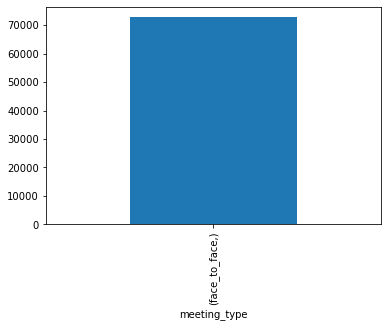

In [59]:
data[['meeting_type']].value_counts().plot(kind="bar")

<AxesSubplot:title={'center':'MCMF Meeting Type'}, xlabel='Format', ylabel='Number of Programs'>

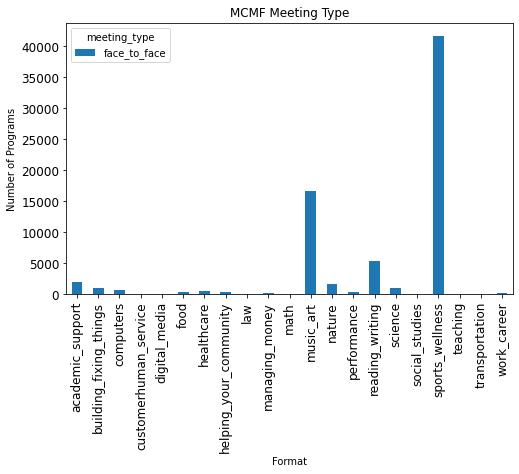

In [60]:
pd.crosstab(index=data['category_name'],
            columns=data["meeting_type"]).plot(kind='bar',
                                         title="MCMF Meeting Type",
                                                           figsize=(8,5),
                                                           xlabel="Format",
                                                           ylabel="Number of Programs",
                                                           fontsize="large")

### Capacity

<AxesSubplot:>

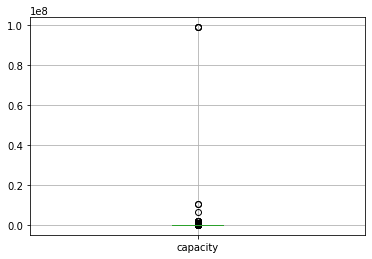

In [18]:
data[['capacity']].boxplot()

In [14]:
data[['capacity']].idxmax()
data.capacity[51547]

99101812.0

Capacity of 99101812 is an outlier.

In [15]:
data[['capacity']].describe()

,capacity
count,6.642500e+04
mean,5.505564e+03
std,6.693701e+05
min,0.000000e+00
25%,1.000000e+01
50%,1.200000e+01
75%,2.000000e+01
max,9.910181e+07


Median capacity is 12, which shows the mean is definitely being pulled up by outlier(s).

### Min/Max Age

C:\Users\jagli\AppData\Local\Temp\ipykernel_32728\4186211926.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["Min Age", "Max Age"])


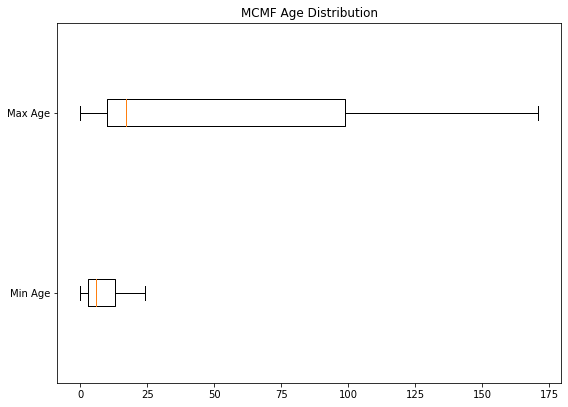

In [34]:
age = [data.min_age, data.max_age]
fig = plt.figure(figsize=(7, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_yticklabels(["Min Age", "Max Age"])
plt.title("MCMF Age Distribution")
bp = ax.boxplot(age, vert=0)
plt.show()

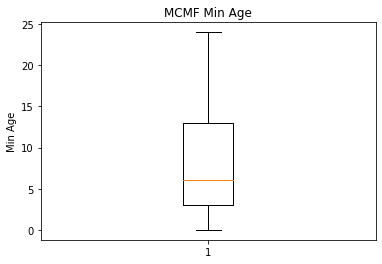

In [21]:
plt.boxplot(data.min_age)
plt.title("MCMF Min Age")
plt.ylabel("Min Age")
#plt.figure(figsize=(1, 10))
plt.show()

In [12]:
data.min_age.describe()

count    72790.000000
mean         7.994175
std          5.886564
min          0.000000
25%          3.000000
50%          6.000000
75%         13.000000
max         24.000000
Name: min_age, dtype: float64

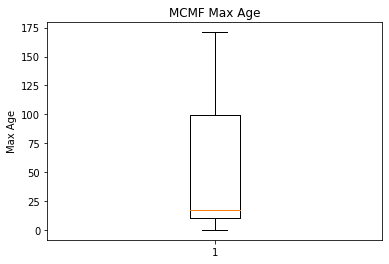

In [11]:
plt.boxplot(data.max_age)
plt.title("MCMF Max Age")
plt.ylabel("Max Age")
plt.show()

In [13]:
data.max_age.describe()

count    72790.000000
mean        43.916527
std         42.310283
min          0.000000
25%         10.000000
50%         17.000000
75%         99.000000
max        171.000000
Name: max_age, dtype: float64

### Program price

<AxesSubplot:>

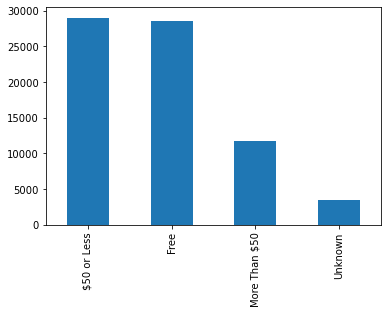

In [33]:
data.program_price.value_counts().plot(kind='bar')

### Program pays participants

<AxesSubplot:title={'center':'Program Pays Participants'}, ylabel='Number of Programs'>

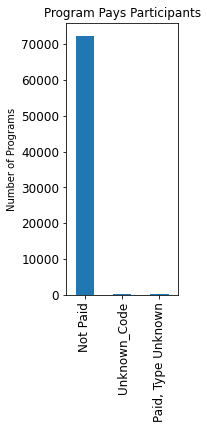

In [42]:
data.program_pays_participants.value_counts().plot(kind="bar",
                                                           title="Program Pays Participants",
                                                           figsize=(2,5),
                                                           xlabel="",
                                                           ylabel="Number of Programs",
                                                           fontsize="large")

In [35]:
data.program_pays_participants.value_counts()

Not Paid              72257
Unknown_Code            311
Paid, Type Unknown      222
Name: program_pays_participants, dtype: int64

### Program has scholarships

<AxesSubplot:title={'center':'Program Has Scholarships'}, ylabel='Number of Programs'>

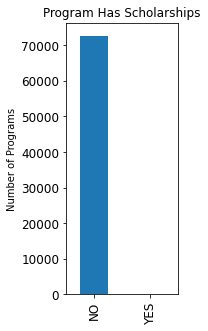

In [43]:
data.program_has_scholarships.value_counts().plot(kind="bar",
                                                           title="Program Has Scholarships",
                                                           figsize=(2,5),
                                                           xlabel="",
                                                           ylabel="Number of Programs",
                                                           fontsize="large")

In [81]:
data['Program Has Scholarships'].value_counts()

NO     84732
YES      146
Name: Program Has Scholarships, dtype: int64

Few programs have scholarships, which is a barrier to entry for those who can't afford to pay.

### Program Provides Free Food

<AxesSubplot:title={'center':'Program Provides Free Food'}, ylabel='Number of Programs'>

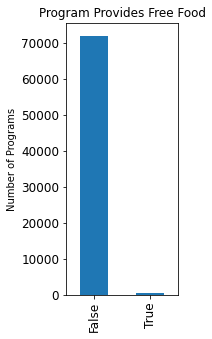

In [44]:
data.program_provides_free_food.value_counts().plot(kind="bar",
                                                           title="Program Provides Free Food",
                                                           figsize=(2,5),
                                                           xlabel="",
                                                           ylabel="Number of Programs",
                                                           fontsize="large")

In [40]:
data.program_provides_free_food.value_counts()

False    71943
True       500
Name: program_provides_free_food, dtype: int64

Some programs provide free food, which may help those who can't afford to pay for food.

## Multiple Variables

In [99]:
data.corr()

,Id,Capacity,Min Age,Max Age,Latitude,Longitude
Id,1.000000,0.008997,0.049961,-0.005734,0.012062,-0.001615
Capacity,0.008997,1.000000,-0.007441,0.014081,-0.002273,-0.000436
Min Age,0.049961,-0.007441,1.000000,0.485268,-0.069563,0.036191
Max Age,-0.005734,0.014081,0.485268,1.000000,-0.029184,0.030031
Latitude,0.012062,-0.002273,-0.069563,-0.029184,1.000000,-0.067392
Longitude,-0.001615,-0.000436,0.036191,0.030031,-0.067392,1.000000


### Category Name

<AxesSubplot:xlabel='category_name'>

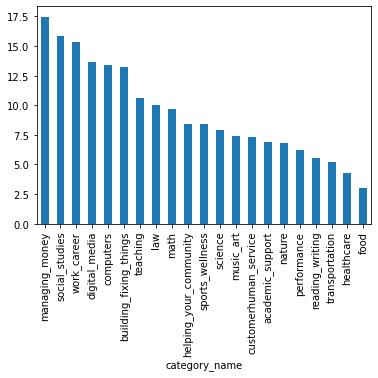

In [43]:
data.groupby('category_name').min_age.mean().sort_values(ascending=False).plot(kind='bar')


<AxesSubplot:xlabel='Category Name'>

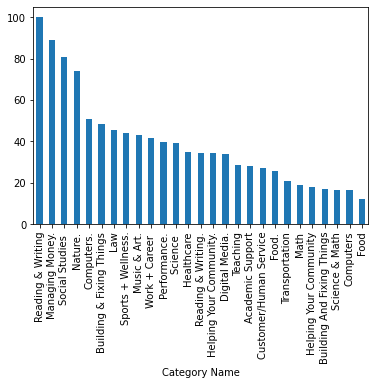

In [89]:
data.groupby('Category Name')['Max Age'].mean().sort_values(ascending=False).plot(kind='bar')


<AxesSubplot:xlabel='category_name'>

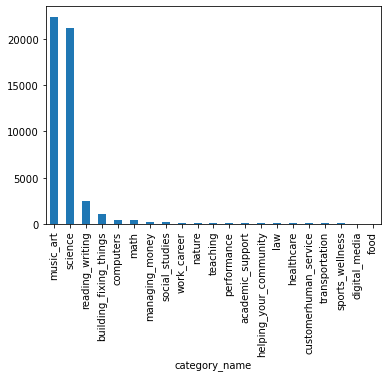

In [44]:
data.groupby('category_name')['capacity'].mean().sort_values(ascending=False).plot(kind='bar')


In [45]:
pd.crosstab(index=data.category_name,
            columns=data.program_price)

program_price,$50 or Less,Free,More Than $50,Unknown
category_name,,,,
academic_support,647,606,761,0
building_fixing_things,254,707,84,14
computers,5,755,13,0
customerhuman_service,2,27,0,0
digital_media,38,50,0,0
food,44,333,0,0
healthcare,51,463,13,0
helping_your_community,8,449,5,0
law,0,2,0,0


In [46]:
pd.crosstab(index=data.category_name,
            columns=data.program_pays_participants)

program_pays_participants,Not Paid,"Paid, Type Unknown",Unknown_Code
category_name,,,
academic_support,1993,5,16
building_fixing_things,1049,5,5
computers,751,15,7
customerhuman_service,12,1,16
digital_media,72,10,6
food,360,7,10
healthcare,503,5,19
helping_your_community,411,27,24
law,1,1,0


In [47]:
pd.crosstab(index=data.category_name,
            columns=data.program_has_scholarships)

program_has_scholarships,NO,YES
category_name,,
academic_support,1997,17
building_fixing_things,1059,0
computers,772,1
customerhuman_service,28,1
digital_media,86,2
food,373,4
healthcare,527,0
helping_your_community,454,8
law,2,0


In [49]:
pd.crosstab(index=data.category_name,
            columns=data.program_provides_free_food)

program_provides_free_food,False,True
category_name,,
academic_support,1982,22
building_fixing_things,1022,24
computers,724,31
customerhuman_service,10,8
digital_media,59,16
food,318,43
healthcare,506,4
helping_your_community,357,75
law,0,2


### Capacity

In [51]:
data.groupby('zipcode')['capacity'].mean()

zipcode
60601.0    18.333333
60602.0    55.000000
60605.0    10.288000
60606.0    31.282051
60607.0    13.496855
             ...    
60661      25.000000
60707      45.233333
60707.0    18.000000
60827      45.906040
60827.0    12.081081
Name: capacity, Length: 171, dtype: float64

Some zipcodes might have more capacity, allowing more youth to participate.

In [52]:
data.groupby('program_price')['capacity'].mean()

program_price
$50 or Less         15.240273
Free             13759.416478
More Than $50       19.026040
Unknown             16.274549
Name: capacity, dtype: float64

In [53]:
data.groupby('geographic_cluster_name')['capacity'].mean()

geographic_cluster_name
ALBANY PARK        114.488038
ARCHER HEIGHTS      42.170543
ARMOUR SQUARE      148.597855
ASHBURN            242.519507
AUBURN GRESHAM     350.173735
                     ...     
WEST LAWN          161.990842
WEST PULLMAN       222.668085
WEST RIDGE          81.474811
WEST TOWN           31.979462
WOODLAWN          5001.817284
Name: capacity, Length: 79, dtype: float64

In [54]:
data.groupby('program_pays_participants')['capacity'].mean()

program_pays_participants
Not Paid              5525.075829
Paid, Type Unknown      67.061350
Unknown_Code            33.202703
Name: capacity, dtype: float64

### Age

In [55]:
data.groupby('zipcode').min_age.mean()

zipcode
60601.0     9.200000
60602.0     7.600000
60605.0    10.017751
60606.0    14.780488
60607.0     8.331915
             ...    
60661      12.500000
60707       8.500000
60707.0    10.300000
60827       7.825301
60827.0     5.918919
Name: min_age, Length: 171, dtype: float64

In [56]:
data.groupby('zipcode').max_age.mean()

zipcode
60601.0    18.400000
60602.0    42.000000
60605.0    55.680473
60606.0    84.365854
60607.0    48.948936
             ...    
60661      24.625000
60707      23.133333
60707.0    22.700000
60827      37.192771
60827.0    17.702703
Name: max_age, Length: 171, dtype: float64

Some zipcodes may have less programs for younger/older kids.

In [57]:
data.groupby('program_provides_transportation').min_age.mean()

program_provides_transportation
NO      7.990219
YES    13.033898
Name: min_age, dtype: float64

In [128]:
data.groupby('program_provides Transportation')['Max Age'].mean()

Program Provides Transportation
NO     42.923514
YES    19.467532
Name: Max Age, dtype: float64

Younger kids might have difficulty getting to programs that don't provide transportation.

### Program Price

In [136]:
pd.crosstab(index=data['Program Price'],
            columns=data["Geographic Cluster Name"])

Geographic Cluster Name,ALBANY PARK,ARCHER HEIGHTS,ARMOUR SQUARE,ASHBURN,AUBURN GRESHAM,AUSTIN,AVALON PARK,AVONDALE,BELMONT CRAGIN,BEVERLY,...,WASHINGTON HEIGHTS,WASHINGTON PARK,WEST ELSDON,WEST ENGLEWOOD,WEST GARFIELD PARK,WEST LAWN,WEST PULLMAN,WEST RIDGE,WEST TOWN,WOODLAWN
Program Price,,,,,,,,,,,,,,,,,,,,,
$50 or Less,189,119,185,573,262,519,20,1037,475,545,...,150,149,192,103,38,257,177,429,801,181
Free,183,104,151,363,506,1085,220,50,250,327,...,639,95,16,331,899,257,345,381,503,219
More Than $50,48,47,101,123,44,233,42,504,91,140,...,54,74,16,49,19,63,32,162,406,92
Unknown,19,7,14,30,14,47,10,14,9,17,...,17,11,7,18,8,15,8,24,64,17


### Geographic Cluster Name

In [137]:
pd.crosstab(index=data['Program Pays Participants'],
            columns=data["Geographic Cluster Name"])

Geographic Cluster Name,ALBANY PARK,ARCHER HEIGHTS,ARMOUR SQUARE,ASHBURN,AUBURN GRESHAM,AUSTIN,AVALON PARK,AVONDALE,BELMONT CRAGIN,BEVERLY,...,WASHINGTON HEIGHTS,WASHINGTON PARK,WEST ELSDON,WEST ENGLEWOOD,WEST GARFIELD PARK,WEST LAWN,WEST PULLMAN,WEST RIDGE,WEST TOWN,WOODLAWN
Program Pays Participants,,,,,,,,,,,,,,,,,,,,,
Not Paid,439,277,448,1085,822,1852,292,1599,825,1029,...,856,324,231,495,952,592,546,996,1768,509
"Paid, Type Unknown",0,0,3,2,2,9,0,6,0,0,...,0,5,0,0,2,0,6,0,1,0
Unknown_Code,0,0,0,2,2,23,0,0,0,0,...,4,0,0,6,10,0,10,0,5,0


In [138]:
pd.crosstab(index=data['Program Has Scholarships'],
            columns=data["Geographic Cluster Name"])

Geographic Cluster Name,ALBANY PARK,ARCHER HEIGHTS,ARMOUR SQUARE,ASHBURN,AUBURN GRESHAM,AUSTIN,AVALON PARK,AVONDALE,BELMONT CRAGIN,BEVERLY,...,WASHINGTON HEIGHTS,WASHINGTON PARK,WEST ELSDON,WEST ENGLEWOOD,WEST GARFIELD PARK,WEST LAWN,WEST PULLMAN,WEST RIDGE,WEST TOWN,WOODLAWN
Program Has Scholarships,,,,,,,,,,,,,,,,,,,,,
NO,439,277,451,1088,826,1878,292,1605,825,1029,...,858,329,231,501,964,592,562,996,1774,509
YES,0,0,0,1,0,6,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0


## Age EDA for 05/17

### Min/Max Age Distribution

C:\Users\jagli\AppData\Local\Temp\ipykernel_10416\4186211926.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["Min Age", "Max Age"])


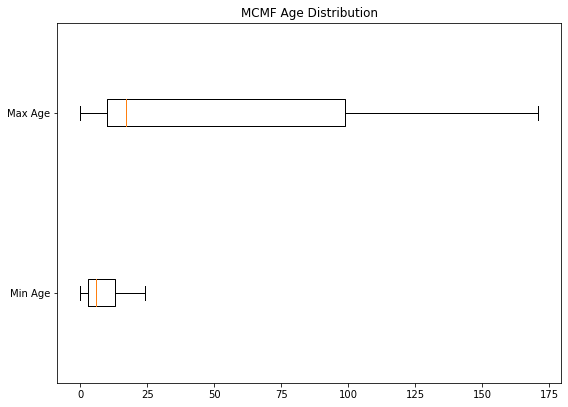

In [4]:
age = [data.min_age, data.max_age]
fig = plt.figure(figsize=(7, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_yticklabels(["Min Age", "Max Age"])
plt.title("MCMF Age Distribution")
bp = ax.boxplot(age, vert=0)
plt.show()

In [6]:
data.min_age.describe()

count    72790.000000
mean         7.994175
std          5.886564
min          0.000000
25%          3.000000
50%          6.000000
75%         13.000000
max         24.000000
Name: min_age, dtype: float64

In [52]:
data.min_age.mode()

0    6
Name: min_age, dtype: int64

In [13]:
data.max_age.describe()

count    72790.000000
mean        43.916527
std         42.310283
min          0.000000
25%         10.000000
50%         17.000000
75%         99.000000
max        171.000000
Name: max_age, dtype: float64

In [53]:
data.max_age.mode()

0    99
Name: max_age, dtype: int64

### Min/Max Age Grouped by Geographic Cluster

<AxesSubplot:xlabel='geographic_cluster_name'>

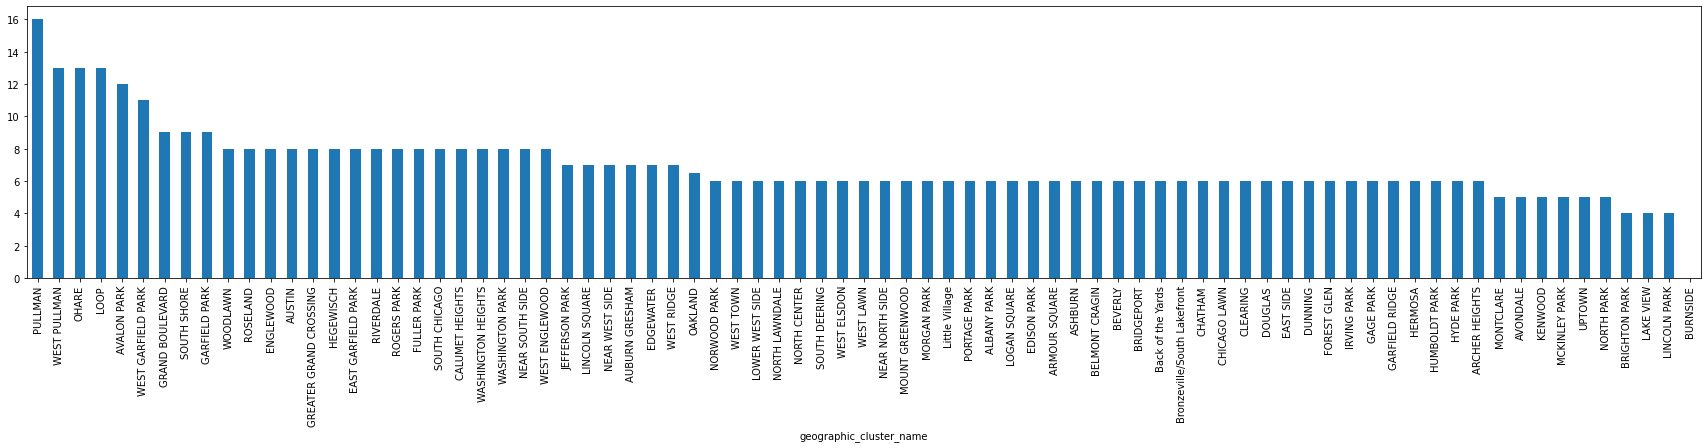

In [51]:
data.groupby('geographic_cluster_name')['min_age'].median().sort_values(ascending=False).plot(kind='bar',
                                                                                            figsize=(30,5))


<AxesSubplot:xlabel='geographic_cluster_name,None'>

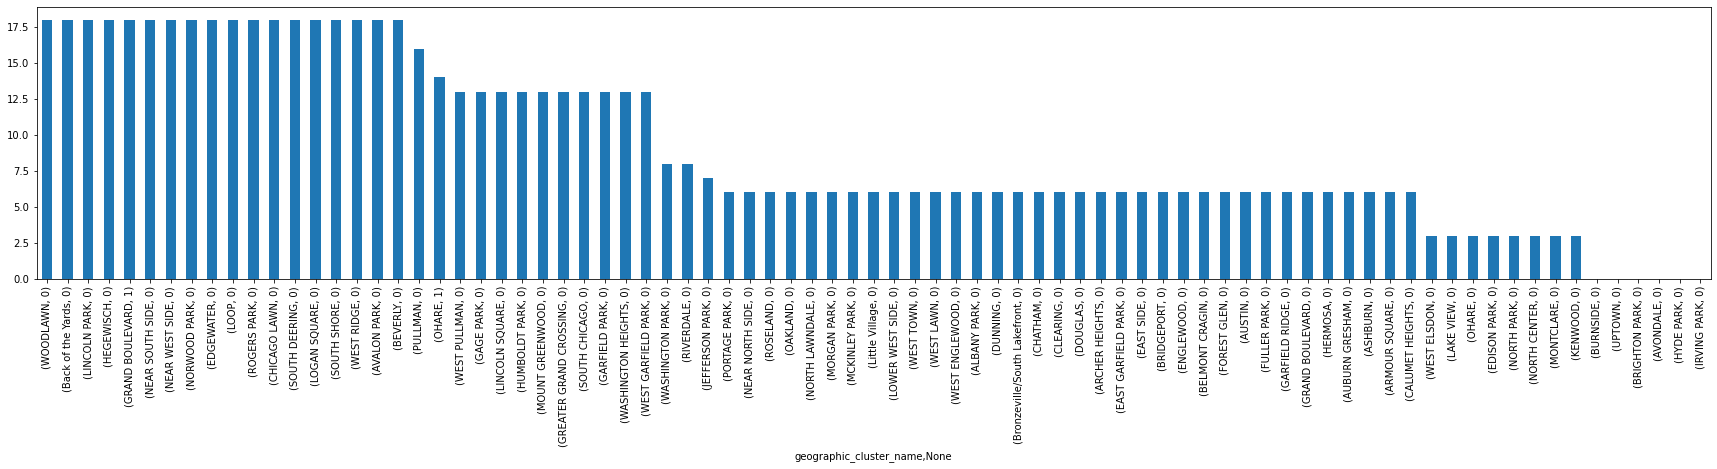

In [58]:
data.groupby('geographic_cluster_name')['min_age'].apply(lambda x: x.mode()).sort_values(ascending=False).plot(kind='bar',
                                                                                                               figsize=(30,5))

<AxesSubplot:xlabel='geographic_cluster_name'>

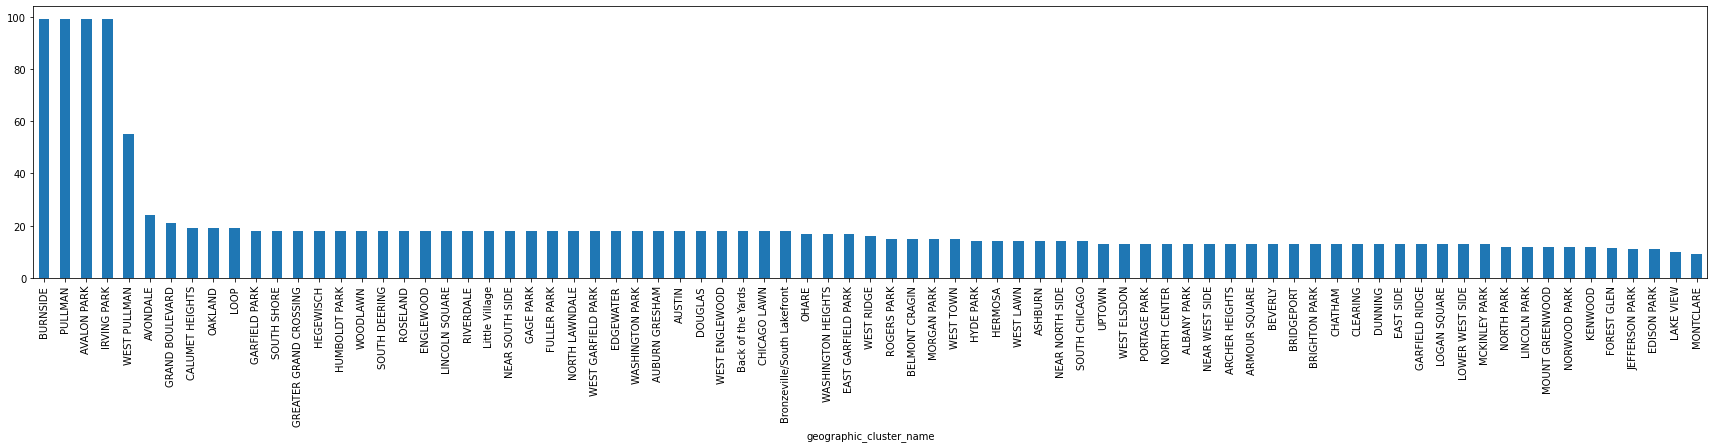

In [29]:
data.groupby('geographic_cluster_name')['max_age'].median().sort_values(ascending=False).plot(kind='bar',
                                                                                            figsize=(30,5))


<AxesSubplot:xlabel='geographic_cluster_name,None'>

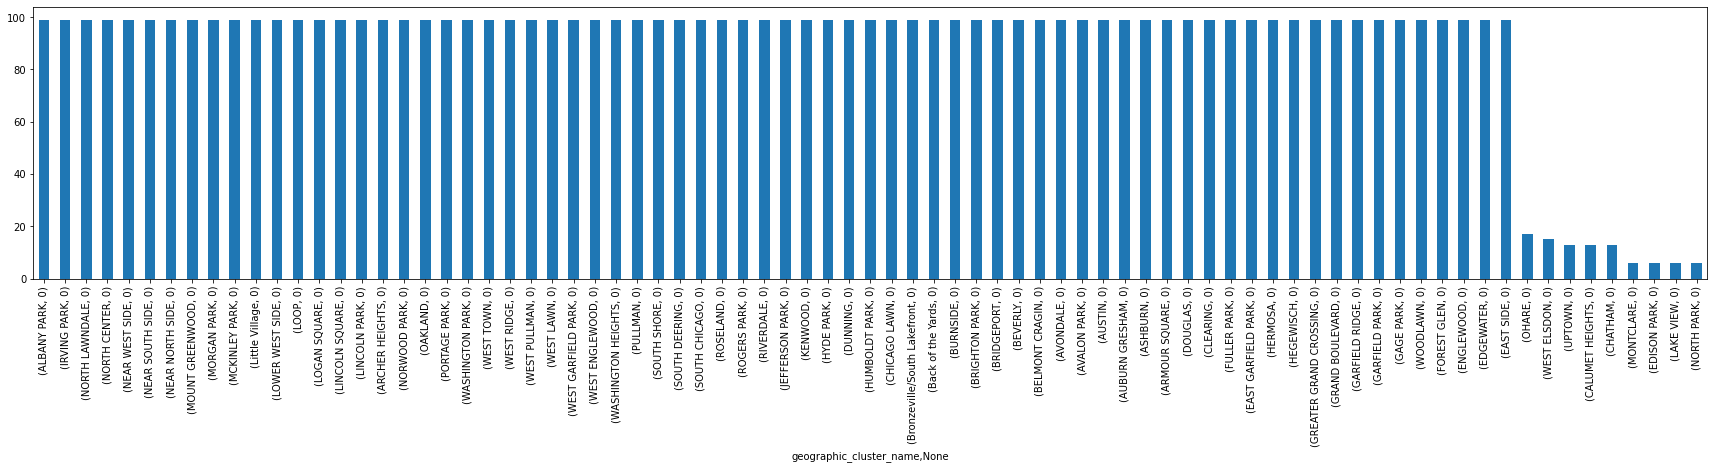

In [59]:
data.groupby('geographic_cluster_name')['max_age'].apply(lambda x: x.mode()).sort_values(ascending=False).plot(kind='bar',
                                                                                                               figsize=(30,5))

### Age Range

In [4]:
data["age_range"] = data.max_age - data.min_age

In [5]:
data.age_range.describe()

count    72790.000000
mean        35.922352
std         39.846904
min          0.000000
25%          4.000000
50%          8.000000
75%         81.000000
max        158.000000
Name: age_range, dtype: float64

<AxesSubplot:xlabel='geographic_cluster_name'>

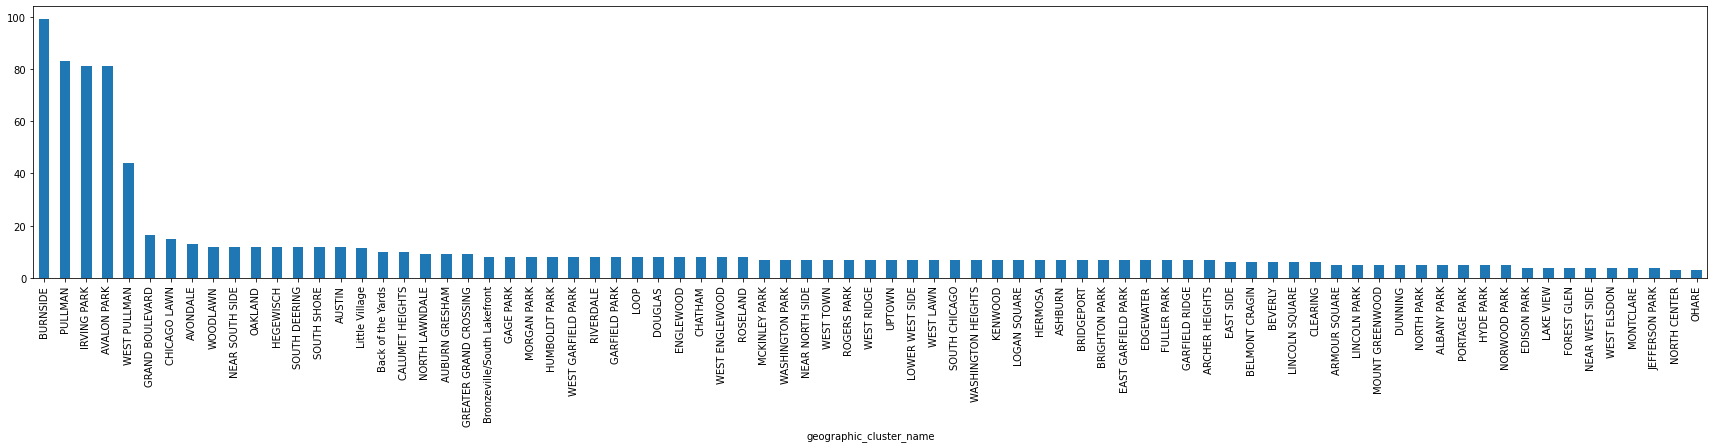

In [48]:
data.groupby('geographic_cluster_name')['age_range'].median().sort_values(ascending=False).plot(kind='bar',
                                                                                            figsize=(30,5))


<AxesSubplot:xlabel='geographic_cluster_name,None'>

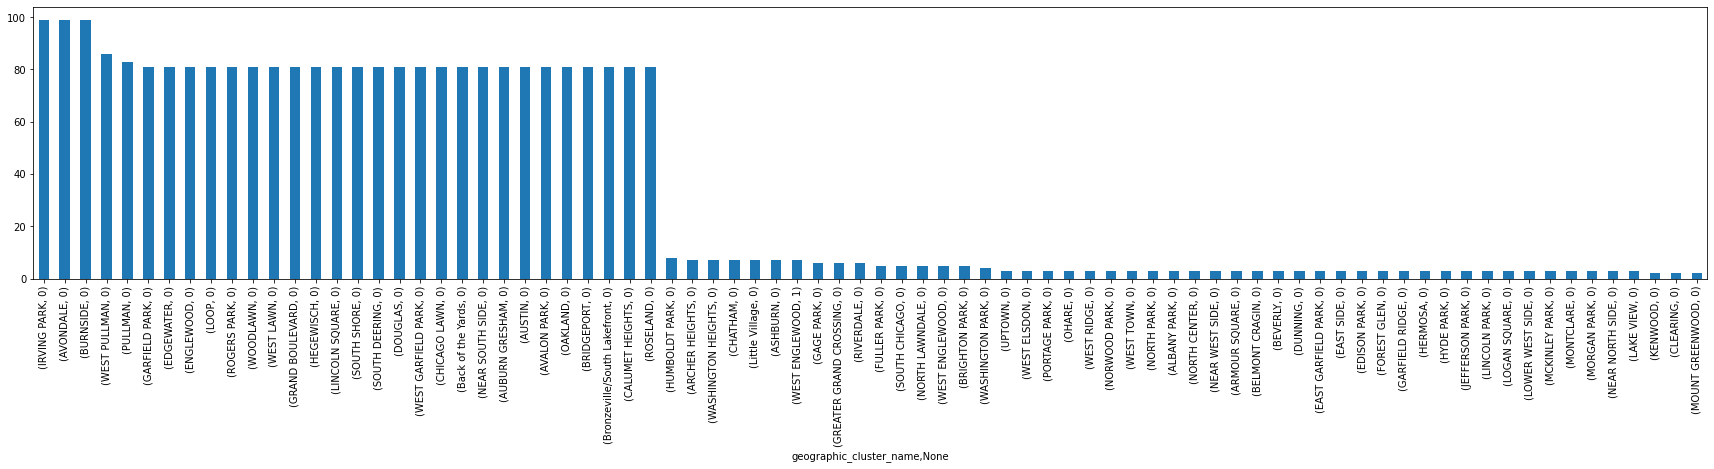

In [60]:
data.groupby('geographic_cluster_name')['age_range'].apply(lambda x: x.mode()).sort_values(ascending=False).plot(kind='bar',
                                                                                                               figsize=(30,5))

## Visualizations for 05/21

<AxesSubplot:title={'center':'Max Age of Programs'}, xlabel='Neighborhood', ylabel='Median Max Age'>

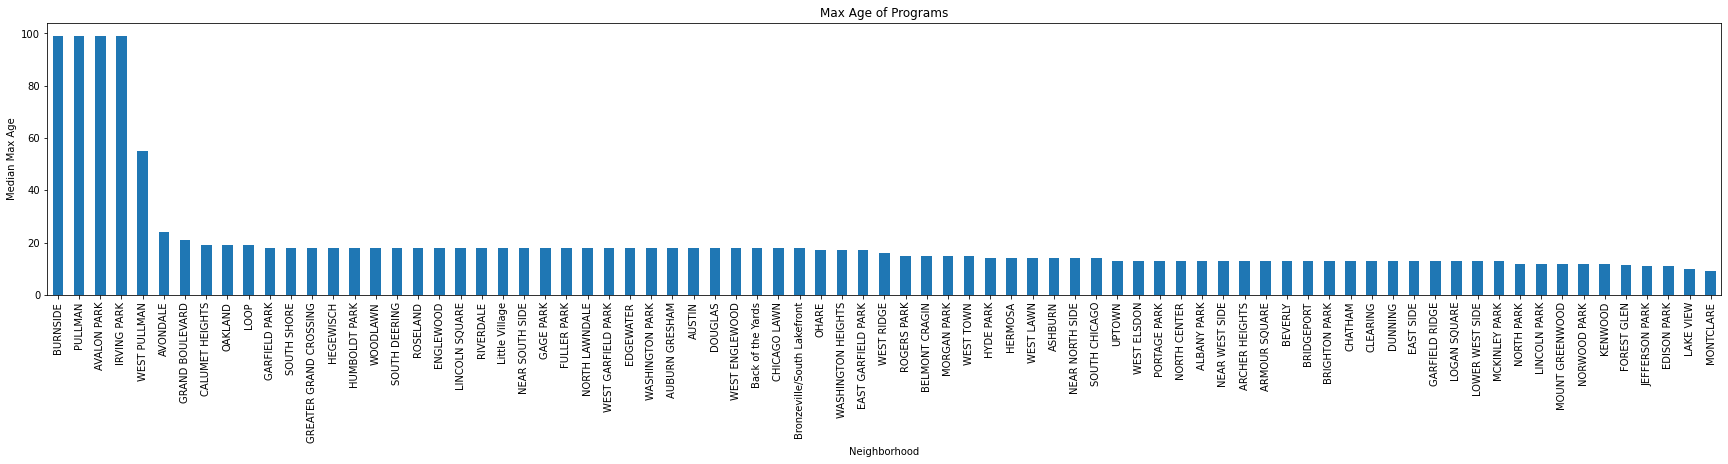

In [21]:
data.groupby('geographic_cluster_name')['max_age'].median().sort_values(ascending=False).plot(kind='bar',
                                                                                            figsize=(30,5),
                                                                                            title="Max Age of Programs",
                                                                                            xlabel="Neighborhood",
                                                                                            ylabel="Median Max Age")

#### Can change the variable 'max_age' to min_age, age_range, capacity, etc.
#### Can change median to mean or mode


<AxesSubplot:xlabel='geographic_cluster_name'>

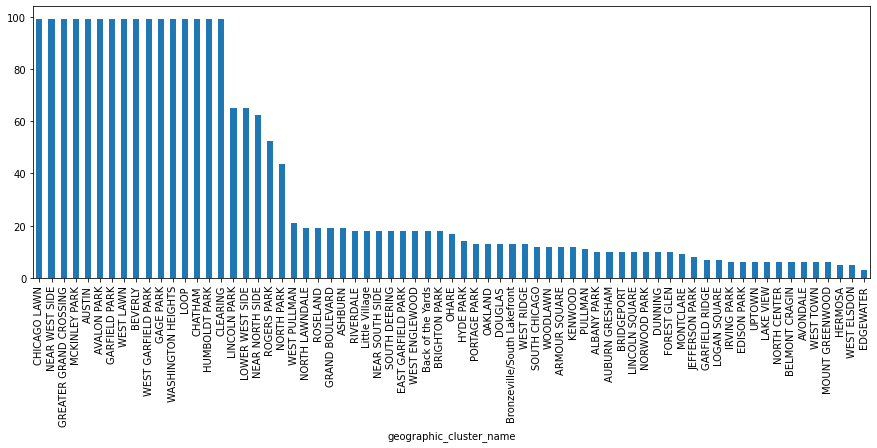

In [8]:
data[data.category_name == ("science" or "nature")].groupby('geographic_cluster_name')['max_age'].median().sort_values(ascending=False).plot(kind='bar',
                                                                                            figsize=(15,5))

#### Can change "NEAR WEST SIDE" to other clusters
#### Can change the variable 'max_age' to min_age, age_range, capacity, etc.
#### Can change median to mean or mode


## Bar Chart for Shiny App

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [242]:
# first filter by user-input age range slider
# "data" variable is just the cleaned dataset
data_age = data[(data.min_age >= 5) & (data.max_age <= 70)]

In [243]:
# then filter by user-input cluster names
data_clusters = data_age[(data_age.geographic_cluster_name == "AUSTIN") | 
                         (data_age.geographic_cluster_name == "NORTH LAWNDALE") |
                         (data_age.geographic_cluster_name == "HUMBOLDT PARK") |
                         (data_age.geographic_cluster_name == "EAST GARFIELD PARK") |
                         (data_age.geographic_cluster_name == "ENGLEWOOD") |
                         (data_age.geographic_cluster_name == "AUBURN GRESHAM") |
                         (data_age.geographic_cluster_name == "EAST GARFIELD PARK") |
                         (data_age.geographic_cluster_name == "WEST GARFIELD PARK") |
                         (data_age.geographic_cluster_name == "ROSELAND") |
                         (data_age.geographic_cluster_name == "GREATER GRAND CROSSING") |
                         (data_age.geographic_cluster_name == "WEST ENGLEWOOD") |
                         (data_age.geographic_cluster_name == "SOUTH SHORE") |
                         (data_age.geographic_cluster_name == "NEW CITY") |
                         (data_age.geographic_cluster_name == "CHICAGO LAWN") | 
                         (data_age.geographic_cluster_name == "SOUTH LAWNDALE") |
                         (data_age.geographic_cluster_name == "WEST PULLMAN")]

In [244]:
# then filter by  user-input category names
final_data = data_clusters[(data_clusters.category_name == "science") |
                           (data_clusters.category_name == "academic_support") |
                           (data_clusters.category_name == "work_career") |
                           (data_clusters.category_name == "healthcare")]

In [255]:
# change metric (age, capacity, etc.) and agg function (mean, median, count)
final_data_agg = final_data.groupby(["geographic_cluster_name", "category_name"]).agg(selected_metric=("capacity", "median")).reset_index()

In [256]:
final_data_agg

,geographic_cluster_name,category_name,selected_metric
0,AUBURN GRESHAM,academic_support,22.5
1,AUBURN GRESHAM,science,10.0
2,AUBURN GRESHAM,work_career,10.0
3,AUSTIN,academic_support,20.0
4,AUSTIN,healthcare,16.5
5,AUSTIN,science,8.0
6,AUSTIN,work_career,15.0
7,CHICAGO LAWN,work_career,NaN
8,EAST GARFIELD PARK,academic_support,15.0
9,EAST GARFIELD PARK,work_career,15.0


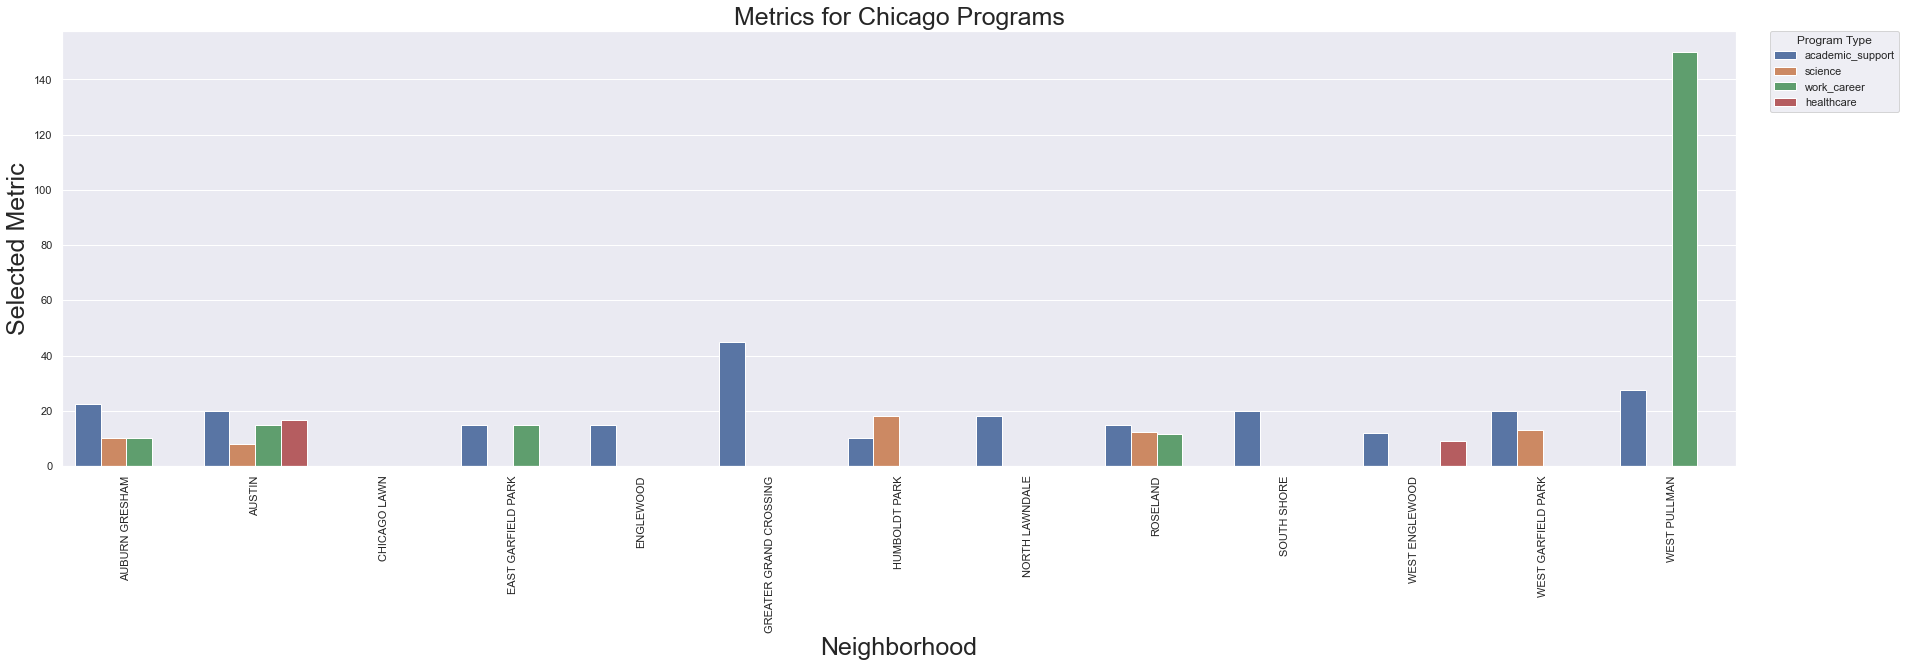

In [289]:
# can change size
rcParams['figure.figsize'] = 30,8

ax = sns.barplot(x=final_data_agg.geographic_cluster_name,
            y=final_data_agg.iloc[:,2],
            hue=final_data_agg.category_name,
            data=final_data_agg)
plt.xticks(rotation=90)
plt.xlabel("Neighborhood", fontsize=25)
plt.ylabel("Selected Metric", fontsize=25)
plt.title("Metrics for Chicago Programs", fontsize=25)
plt.legend(title="Program Type", bbox_to_anchor=(1.02, 1.0), loc='upper left', borderaxespad=0)

plt.show()